**Question 1 :** 1. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous
exercises), using the Douro and Tejo basins as the pre-determined groups. Produce a biplot with
‘Catchment_name’ as a grouping variable. 

In [22]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [23]:
# Load the data and subset it
df1 = pd.read_csv('/content/EFIplus_medit.zip', compression='zip', sep=";")
df = df1[(df1['Catchment_name'] == 'Tejo') | (df1['Catchment_name'] == "Douro") | (df1['Catchment_name'] == "Mondego") | (df1['Catchment_name'] == "Minho")]

# Select the variables of interest
columns = ['Catchment_name', 'Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[columns]

# Drop any rows with missing values and reset the index
df = df.dropna().reset_index(drop=True)

# Separate the quantitative environmental variables
X = df.drop("Catchment_name", axis=1)
y = df["Catchment_name"]


In [24]:
# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Perform dimensionality reduction
X_lda = lda.transform(X)


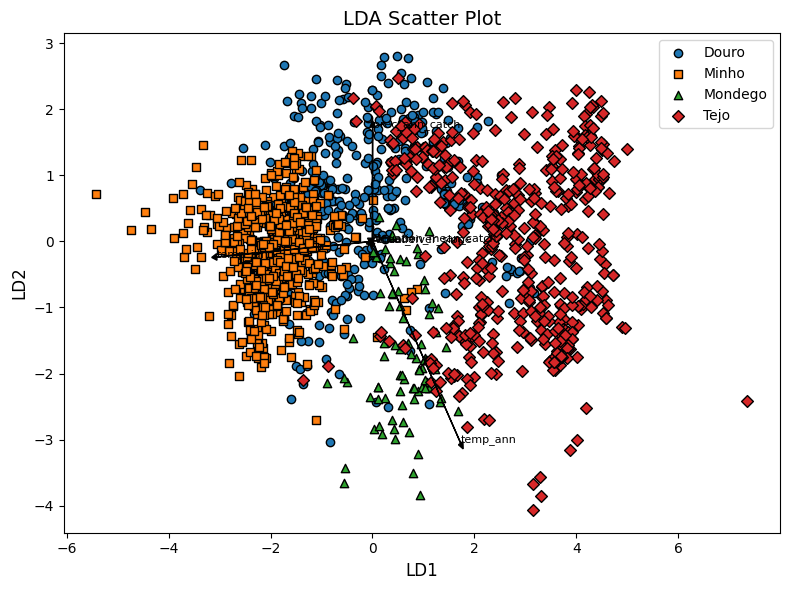

In [34]:
# Create a biplot
fig, ax = plt.subplots(facecolor='white', figsize=(8, 6))
markers = ['o', 's', '^', 'D']  # Marker styles for different catchments

for i, catchment in enumerate(np.unique(y)):
    ax.scatter(X_lda[y == catchment, 0], X_lda[y == catchment, 1], label=catchment, marker=markers[i], edgecolors='k', linewidths=1)

ax.set_xlabel('LD1', fontsize=12)
ax.set_ylabel('LD2', fontsize=12)
ax.set_title('LDA Scatter Plot', fontsize=14)
ax.legend()

# Add variable loadings to the biplot
coef = lda.coef_[0]
for i, variable in enumerate(X.columns[:-1]):
    ax.arrow(0, 0, coef[i] * 2, coef[i + 1] * 2, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.annotate(variable, (coef[i] * 2, coef[i + 1] * 2), fontsize=8)


plt.tight_layout()
plt.show()




**Question 2 :** Try to build interactive plots that display data in the space defined by the Discriminant Functions.


In [28]:
# Create a DataFrame with the LDA results
lda_df = pd.DataFrame(X_lda, columns=[f'LD{i+1}' for i in range(X_lda.shape[1])])
lda_df['Catchment_name'] = y

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(lda_df, x='LD1', y='LD2', color='Catchment_name', title='LDA Scatter Plot')
fig.update_traces(marker=dict(size=8))  # Modify marker size
fig.update_layout(title_font=dict(size=16), showlegend=True, legend_title='Catchment')  # Adjust title font size and legend
fig.show()
